In [1]:
import os
from pprint import pprint

In [2]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from scipy.io.arff import loadarff # type: ignore
import seaborn as sns # type: ignore

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt # type: ignore

In [4]:
data_test = loadarff(os.path.join("ECG5000", "ECG5000_TEST.arff"))
data_train = loadarff(os.path.join("ECG5000", "ECG5000_TRAIN.arff"))

In [5]:
d_tt = pd.DataFrame(data_test[0])
d_tr = pd.DataFrame(data_train[0])
dataset = pd.concat([d_tt, d_tr])
# d_concat.shape #видим что в датасете 5000 примеров и 141 признак
dataset.keys()
# pd.plotting.scatter_matrix(d_concat.head())

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att132', 'att133', 'att134', 'att135', 'att136', 'att137', 'att138',
       'att139', 'att140', 'target'],
      dtype='object', length=141)

In [6]:
# sns.kdeplot(dataset["att1"], color = "green", 
#             shade = True)

In [20]:
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,b'1'
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,b'1'
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [8]:
dataset["target"].unique()

array([b'1', b'2', b'3', b'4', b'5'], dtype=object)

In [57]:
from numpy import float32
from pandas import DataFrame, Series

df = DataFrame()

df["target"] = dataset["target"]
df["data"] = dataset.iloc[:, :-1].values.astype(float32).tolist()

df

,target,data
0,b'1',"[3.6908442974090576, 0.7114143371582031, -2.11..."
1,b'1',"[-1.3481322526931763, -3.996037483215332, -4.2..."
2,b'1',"[1.0242946147918701, -0.5903142094612122, -1.9..."
3,b'1',"[0.5456569194793701, -1.0143829584121704, -2.3..."
4,b'1',"[0.6611328125, -1.5524705648422241, -3.1246407..."
...,...,...
495,b'4',"[-0.4785773754119873, -1.779958963394165, -2.3..."
496,b'4',"[-1.3252098560333252, -2.480992317199707, -2.9..."
497,b'4',"[-0.02196384221315384, -0.9124338626861572, -1..."
498,b'5',"[0.28801101446151733, -1.0980195999145508, -2...."


TypeError: Image data of dtype object cannot be converted to float

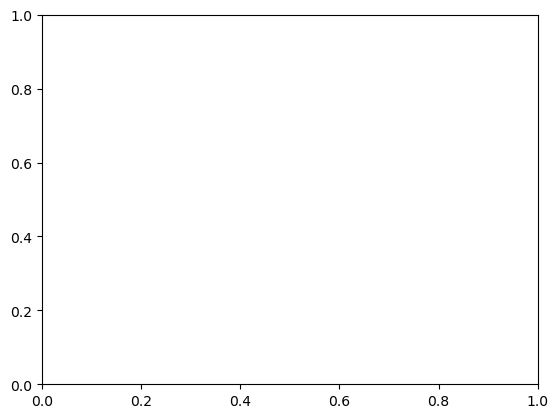